## RFM Analysis
R - Recency

F- Frequency

M - Monetary

RFM analysis is done superstore data over a period of 1 year

### Read and visualize the data

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [112]:
retail_df = pd.read_csv('Online+Retail.csv',encoding = 'ISO-8859-1')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [113]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2. Dropping null values

In [114]:
100*retail_df.isnull().sum()/len(retail_df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [115]:
retail_df = retail_df.dropna()

In [116]:
100*retail_df.isnull().sum()/len(retail_df)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [117]:
# creating new column amount = unitprice * quantity
retail_df['Amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [118]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


### 3: Preparing table for data modeling

In [119]:
df = pd.DataFrame()

In [120]:
# amount is the monetary part
df['Amount'] = retail_df.groupby('CustomerID')['Amount'].sum()

In [121]:
df = df.reset_index()
df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [122]:
# converting InvoiceDate to datetime format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [123]:
# calculating recency
retail_df['Recency'] = retail_df['InvoiceDate'].max() - retail_df['InvoiceDate']

In [124]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [125]:
recent = retail_df.groupby('CustomerID')['Recency'].min()
recent = recent.reset_index()
recent.head()

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [126]:
# merging Recency with Amount
df = df.merge(recent,on='CustomerID',how='inner')

In [127]:
df.head()

,CustomerID,Amount,Recency
0,12346.0,0.00,325 days 02:33:00
1,12347.0,4310.00,1 days 20:58:00
2,12348.0,1797.24,74 days 23:37:00
3,12349.0,1757.55,18 days 02:59:00
4,12350.0,334.40,309 days 20:49:00


In [128]:
# keeping only days in Recency column
df['Recency'] = df['Recency'].dt.days

In [129]:
# Adding frequency to df table
freq = retail_df.groupby('CustomerID')['InvoiceNo'].count()
freq.reset_index()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [130]:
# merging Frequency with Amount & Recency
df = df.merge(freq,on='CustomerID',how='inner')

In [131]:
df.rename(columns = {'InvoiceNo':'Frequency'}, inplace = True)

In [132]:
df.head()

,CustomerID,Amount,Recency,Frequency
0,12346.0,0.00,325,2
1,12347.0,4310.00,1,182
2,12348.0,1797.24,74,31
3,12349.0,1757.55,18,73
4,12350.0,334.40,309,17


### Checking outliers

In [133]:
df.describe()

,CustomerID,Amount,Recency,Frequency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,91.047118,93.053294
std,1722.390705,8219.345141,100.765435,232.471608
min,12346.000000,-4287.630000,0.000000,1.000000
25%,13812.750000,293.362500,16.000000,17.000000
50%,15300.500000,648.075000,49.000000,42.000000
75%,16778.250000,1611.725000,142.000000,102.000000
max,18287.000000,279489.020000,373.000000,7983.000000


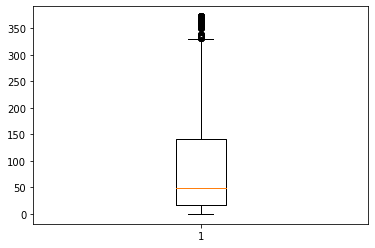

In [134]:
plt.boxplot(df['Recency'])
plt.show()

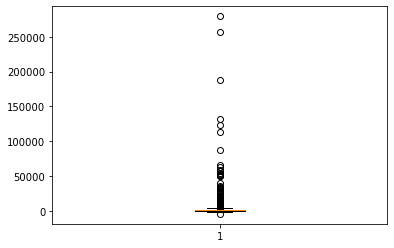

In [135]:
plt.boxplot(df['Amount'])
plt.show()

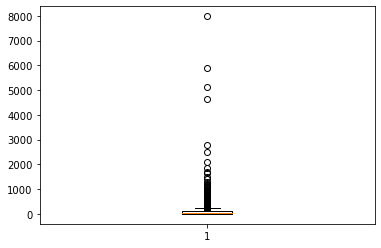

In [136]:
plt.boxplot(df['Frequency'])
plt.show()

In [142]:
# removig outliers
# Amount
Q05 = df.Amount.quantile(0.05)
Q95 = df.Amount.quantile(0.95)
IQR = Q95 - Q05
df = df[(df['Amount'] >= Q05 - 1.5*IQR) & (df['Amount'] <= Q95 + 1.5*IQR)]

# Frequency
Q05 = df.Frequency.quantile(0.05)
Q95 = df.Frequency.quantile(0.95)
IQR = Q95 - Q05
df = df[(df['Frequency'] >= Q05 - 1.5*IQR) & (df['Frequency'] <= Q95 + 1.5*IQR)]

# Recency
Q05 = df.Recency.quantile(0.05)
Q95 = df.Recency.quantile(0.95)
IQR = Q95 - Q05
df = df[(df['Recency'] >= Q05 - 1.5*IQR) & (df['Recency'] <= Q95 + 1.5*IQR)]

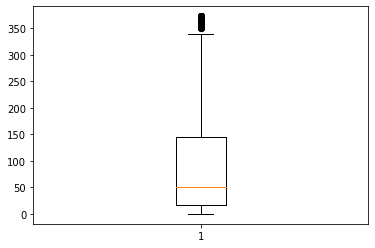

In [143]:
plt.boxplot(df['Recency'])
plt.show()

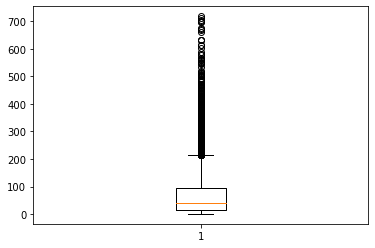

In [144]:
plt.boxplot(df['Frequency'])
plt.show()

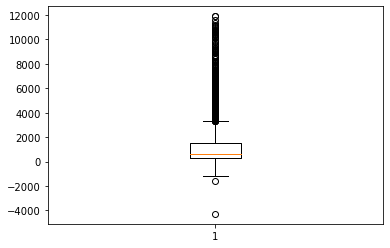

In [145]:
plt.boxplot(df['Amount'])
plt.show()

### Scaling of variables

In [146]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [148]:
rfm_df = df[['Amount','Recency','Frequency']]

In [149]:
# Instantiate
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

In [152]:
rfm_scaled.shape

(4280, 3)

In [155]:
rfm_scaled = pd.DataFrame(rfm_scaled)

In [157]:
rfm_scaled.columns = [['Amount','Recency','Frequency']]

In [158]:
rfm_scaled.head()

,Amount,Recency,Frequency
0,-0.754208,2.298087,-0.758814
1,1.877245,-0.908672,1.073866
2,0.343089,-0.186161,-0.463549
3,0.318857,-0.740416,-0.035923
4,-0.550042,2.139729,-0.606090


### 4. Modelling

In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [163]:
# elbow curve to find out the optimum number of clusters
# inertia is sum of squared distances of a point from its cluster center

ssd = []

cluster_num_range = [1,2,3,4,5,6,7,8]

for num in cluster_num_range:
    kmeans = KMeans(n_clusters=num, max_iter=100)
    kmeans.fit(rfm_scaled)
    ssd.append(kmeans.inertia_)

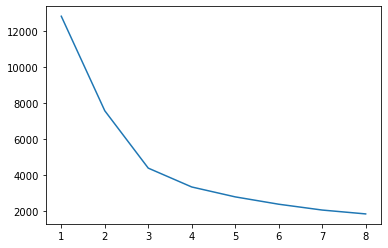

In [167]:
plt.plot(cluster_num_range,ssd)

#### We observe that SSD decreases rapidly till number of clusters is 3 but then slows down. It almost plateaus after number of cluster is 4.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [171]:
from sklearn.metrics import silhouette_score

In [180]:
# silhouette analysis

cluster_num_range = [2,3,4,5,6,7,8]

for num in cluster_num_range:
    
    kmeans = KMeans(n_clusters = num, max_iter = 100)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled,cluster_labels)
    print('for {0} clusters, the Silhouette score is {1}'.format(num,silhouette_avg))

for 2 clusters, the Silhouette score is 0.5332008718856671
for 3 clusters, the Silhouette score is 0.5043224964421937
for 4 clusters, the Silhouette score is 0.4773484257374651
for 5 clusters, the Silhouette score is 0.4681802969145282
for 6 clusters, the Silhouette score is 0.4170035723139758
for 7 clusters, the Silhouette score is 0.4086448472490716
for 8 clusters, the Silhouette score is 0.39947528129420024


For 2 and 3 clusters we are getting good silhouette score. The final number should be decided on domain knowledge.

### Building final model using 3 clusters

In [181]:
# Final Model

kmeans = KMeans(n_clusters = 3, max_iter = 100)
kmeans.fit(rfm_scaled)
cluster_labels = kmeans.labels_

In [182]:
df['Labels'] = cluster_labels

In [183]:
df.head()

,CustomerID,Amount,Recency,Frequency,Labels
0,12346.0,0.00,325,2,0
1,12347.0,4310.00,1,182,2
2,12348.0,1797.24,74,31,1
3,12349.0,1757.55,18,73,1
4,12350.0,334.40,309,17,0


<AxesSubplot:xlabel='Labels', ylabel='Amount'>

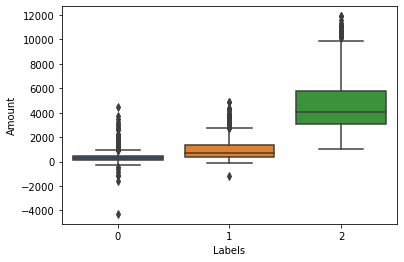

In [189]:
# plot
sns.boxplot(x='Labels', y='Amount', data=df)

Cluster 2 customers are high monetary customers.

<AxesSubplot:xlabel='Labels', ylabel='Recency'>

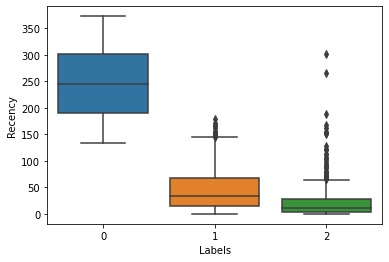

In [190]:
# plot
sns.boxplot(x='Labels', y='Recency', data=df)

Cluster 1 and 2 are most recent customers

<AxesSubplot:xlabel='Labels', ylabel='Frequency'>

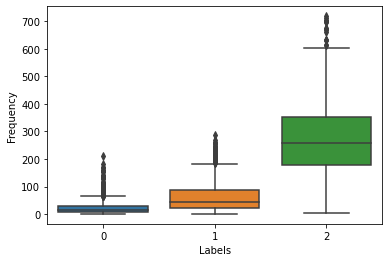

In [191]:
# plot
sns.boxplot(x='Labels', y='Frequency', data=df)

Cluster 2 represents most frequent customers.

**Business Conclusion** - 
- Cluster 2 has the most beneficial customers.
- Marketing schemes, product development should revovle around these customers.